In [1]:
import util
import pandas as pd
import mitsuba as mi
import config
mi.set_variant('scalar_spectral')

from matplotlib import pyplot as plt
%matplotlib inline

# Load Sample Data

In [2]:
csv_save_name = '../../data/supporting_data/sample_data.csv'
data_csv = pd.read_csv(csv_save_name)

In [3]:
data_csv

,id_model,id_hairModel,id_lesion,id_timePoint,id_lesionMat,id_fracBlood,id_mel,id_light,id_hairAlbedo
0,17,72,8,20,10,0.002,0.01,0,2
1,1,69,17,15,15,0.005,0.01,0,2


In [4]:
row = 0 # each row corresponds to a parameter combination (model properties and light conditions)
params = data_csv.iloc[row]

id_model = int(params['id_model']) # skin models ID (used for epidermis, vascular, dermis, hypodermis)
id_hairModel = int(params['id_hairModel']) #hair model ID

id_lesion = int(params['id_lesion']) #lesion model ID
id_timePoint = int(params['id_timePoint']) #timepoint ID for the growing lesion, which determines the size of the lesion
id_lesionMat = int(params['id_lesionMat']) #lesion material ID
id_fracBlood = float(params['id_fracBlood']) #blood fraction value
id_mel = float(params['id_mel']) #melanosome fraction value
id_light = int(params['id_light']) #light condition ID
id_hairAlbedo = int(params['id_hairAlbedo']) #hair albedo index
lesion_directory = config.sDir_lesion_ver1
# get material names
sel_lesionMat, sel_lightName, sel_hair_albedo = util.get_materials_names(id_lesionMat, id_light, id_hairAlbedo)

# get render camera
cam_top = util.get_sensor()

# Render Image and Mask

In [5]:
#render mask
scene_ref = util.render_image(id_model, id_hairModel, id_lesion, sel_lesionMat, id_fracBlood, id_mel,
                              id_timePoint, sel_lightName, sel_hair_albedo, 
                              lesion_directory=lesion_directory,
                              IMAGE=False)
ref_mask = mi.render(scene_ref, sensor=cam_top, spp=32)


Model id = 17
Lesion id = lesion8_T020
Lesion material = HbO2x0.5Epix0.15
Blood fraction of Dermis material = 0.002
Melanosome fraction of Epidermis material = 0.01
Lesion scale = 1.5
Light name =  rural_asphalt_road_4k

loading data from  ../../data/supporting_data/materials/lesions_release/ver1/


In [6]:
# render image
scene_ref = util.render_image(id_model, id_hairModel, id_lesion, sel_lesionMat, id_fracBlood, id_mel,
                                  id_timePoint, sel_lightName, sel_hair_albedo,
                                  lesion_directory=lesion_directory,
                                  IMAGE=True)
ref_image = mi.render(scene_ref, sensor=cam_top, spp=32)

Model id = 17
Lesion id = lesion8_T020
Lesion material = HbO2x0.5Epix0.15
Blood fraction of Dermis material = 0.002
Melanosome fraction of Epidermis material = 0.01
Lesion scale = 1.5
Light name =  rural_asphalt_road_4k

loading data from  ../../data/supporting_data/materials/lesions_release/ver1/


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


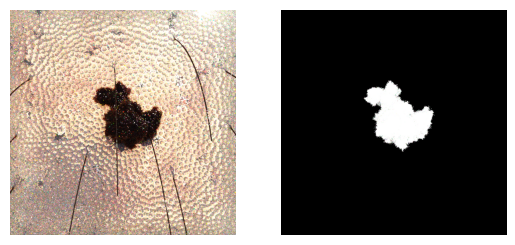

In [7]:
# show results
f, axarr = plt.subplots(1,2)
axarr[0].imshow(ref_image); axarr[0].axis('off')
axarr[1].imshow(ref_mask); axarr[1].axis('off')
plt.show()


# Remove Hair

Model id = 17
Lesion id = lesion8_T020
Lesion material = HbO2x0.5Epix0.15
Blood fraction of Dermis material = 0.002
Melanosome fraction of Epidermis material = 0.01
Lesion scale = 1.5
Light name =  rural_asphalt_road_4k

loading data from  ../../data/supporting_data/materials/lesions_release/ver1/
Model id = 17
Lesion id = lesion8_T020
Lesion material = HbO2x0.5Epix0.15
Blood fraction of Dermis material = 0.002
Melanosome fraction of Epidermis material = 0.01
Lesion scale = 1.5
Light name =  rural_asphalt_road_4k

loading data from  ../../data/supporting_data/materials/lesions_release/ver1/
not using hair


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


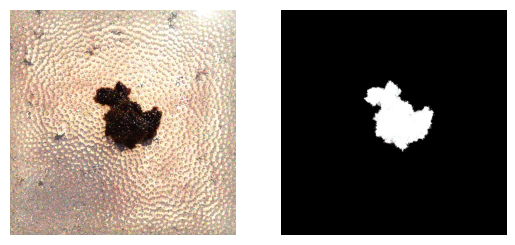

In [8]:
id_hairModel = -1

#render mask
scene_ref = util.render_image(id_model, id_hairModel, id_lesion, sel_lesionMat, id_fracBlood, id_mel,
                              id_timePoint, sel_lightName, sel_hair_albedo,
                              lesion_directory=lesion_directory,
                              IMAGE=False)
ref_mask = mi.render(scene_ref, sensor=cam_top, spp=32)

# render image
scene_ref = util.render_image(id_model, id_hairModel, id_lesion, sel_lesionMat, id_fracBlood, id_mel,
                                  id_timePoint, sel_lightName, sel_hair_albedo,
                                  lesion_directory=lesion_directory,
                                  IMAGE=True)
ref_image = mi.render(scene_ref, sensor=cam_top, spp=32)

# show results
f, axarr = plt.subplots(1,2)
axarr[0].imshow(ref_image); axarr[0].axis('off')
axarr[1].imshow(ref_mask); axarr[1].axis('off')
plt.show()